In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# OS
!cat /etc/issue.net

In [0]:
!head /proc/cpuinfo

In [0]:
!head -n 3 /proc/meminfo

In [0]:
!df -h

In [0]:
!python --version

In [0]:
!nvidia-smi

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLpy/house_data_another/train.csv')

In [0]:
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLpy/house_data_another/test.csv')

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 20 columns):
id               6468 non-null int64
date             6468 non-null object
bedrooms         6468 non-null int64
bathrooms        6468 non-null float64
sqft_living      6468 non-null int64
sqft_lot         6468 non-null int64
floors           6468 non-null float64
waterfront       6468 non-null int64
view             6468 non-null int64
condition        6468 non-null int64
grade            6468 non-null int64
sqft_above       6468 non-null int64
sqft_basement    6468 non-null int64
yr_built         6468 non-null int64
yr_renovated     6468 non-null int64
zipcode          6468 non-null int64
lat              6468 non-null float64
long             6468 non-null float64
sqft_living15    6468 non-null int64
sqft_lot15       6468 non-null int64
dtypes: float64(4), int64(15), object(1)
memory usage: 1010.7+ KB


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB


In [0]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [0]:
train['datetime'] = train.date.str[:-7]

In [0]:
train['datetime'].head()

0    20141013
1    20150225
2    20150218
3    20140627
4    20150115
Name: datetime, dtype: object

In [0]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['datetime'].head()

0   2014-10-13
1   2015-02-25
2   2015-02-18
3   2014-06-27
4   2015-01-15
Name: datetime, dtype: datetime64[ns]

In [0]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day

In [0]:
test['datetime'] = test.date.str[:-7]
test['datetime'] = pd.to_datetime(test['datetime'])
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day

In [0]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,datetime,year,month,day
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014-10-13,2014,10,13
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015-02-25,2015,2,25
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015-02-18,2015,2,18
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,2014-06-27,2014,6,27
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,2015-01-15,2015,1,15


In [0]:
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,datetime,year,month,day
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014-12-09,2014,12,9
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014-12-09,2014,12,9
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014-05-12,2014,5,12
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,2015-04-15,2015,4,15
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,2015-03-12,2015,3,12


In [0]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'datetime', 'year',
       'month', 'day'],
      dtype='object')

In [0]:
test.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'datetime', 'year', 'month', 'day'],
      dtype='object')

In [0]:
train.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,datetime,year,month,day
15030,15030,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023,2014-10-14,2014,10,14
15031,15031,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200,2015-03-26,2015,3,26
15032,15032,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014-05-21,2014,5,21
15033,15033,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015-02-23,2015,2,23
15034,15034,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,2014-10-15,2014,10,15


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 25 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
datetime         15035 non-null datetime64[ns]
year             15035 non-null int

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 24 columns):
id               6468 non-null int64
date             6468 non-null object
bedrooms         6468 non-null int64
bathrooms        6468 non-null float64
sqft_living      6468 non-null int64
sqft_lot         6468 non-null int64
floors           6468 non-null float64
waterfront       6468 non-null int64
view             6468 non-null int64
condition        6468 non-null int64
grade            6468 non-null int64
sqft_above       6468 non-null int64
sqft_basement    6468 non-null int64
yr_built         6468 non-null int64
yr_renovated     6468 non-null int64
zipcode          6468 non-null int64
lat              6468 non-null float64
long             6468 non-null float64
sqft_living15    6468 non-null int64
sqft_lot15       6468 non-null int64
datetime         6468 non-null datetime64[ns]
year             6468 non-null int64
month            6468 non-null int64
day              6468 no

In [0]:
train_label = train['price']

In [0]:
train_label.head()

0    221900.0
1    180000.0
2    510000.0
3    257500.0
4    291850.0
Name: price, dtype: float64

In [0]:
# 이건 그냥 밸류값
train.sqft_living.head()

0    1180
1     770
2    1680
3    1715
4    1060
Name: sqft_living, dtype: int64

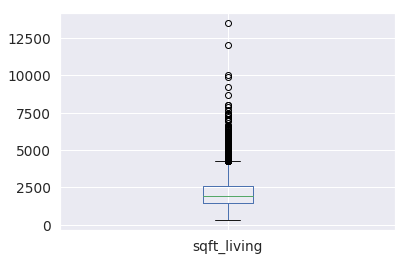

In [0]:
train.sqft_living.plot(kind='box')

In [0]:
train.bedrooms.value_counts()

3     6835
4     4797
2     1931
5     1108
6      188
1      133
7       22
8       10
9        5
0        4
10       2
Name: bedrooms, dtype: int64

In [0]:
train.bathrooms.value_counts()

2.50    3748
1.00    2675
1.75    2112
2.25    1433
2.00    1357
1.50    1009
2.75     843
3.50     510
3.00     493
3.25     410
3.75     108
4.00     100
4.50      64
4.25      57
0.75      45
4.75      16
5.00      14
5.25      11
5.50       7
1.25       5
0.00       4
5.75       3
0.50       3
6.00       2
8.00       2
6.25       1
6.75       1
7.75       1
7.50       1
Name: bathrooms, dtype: int64

In [0]:
train.sqft_lot.head()
# 그냥 밸류값

0     5650
1    10000
2     8080
3     6819
4     9711
Name: sqft_lot, dtype: int64

In [0]:
train.floors.value_counts()

1.0    7361
2.0    5810
1.5    1330
3.0     417
2.5     113
3.5       4
Name: floors, dtype: int64

In [0]:
train.waterfront.value_counts()

0    14928
1      107
Name: waterfront, dtype: int64

In [0]:
train.view.value_counts()

0    13548
2      665
3      373
1      241
4      208
Name: view, dtype: int64

In [0]:
train.condition.value_counts()

3    9793
4    3956
5    1155
2     110
1      21
Name: condition, dtype: int64

In [0]:
train.grade.value_counts()

7     6228
8     4207
9     1855
6     1406
10     781
11     288
5      174
12      61
4       23
13       9
3        2
1        1
Name: grade, dtype: int64

In [0]:
train.sqft_above.head()
# just values

0    1180
1     770
2    1680
3    1715
4    1060
Name: sqft_above, dtype: int64

In [0]:
train.sqft_basement.head()
# just values

0    0
1    0
2    0
3    0
4    0
Name: sqft_basement, dtype: int64

In [0]:
train.yr_built.value_counts()
# 이건 카테고리인가 아닌가?

2014    405
2006    325
2004    305
2005    302
2003    284
2007    281
1977    272
1978    265
1968    254
2008    247
1967    242
1979    235
1959    225
1990    225
1987    223
2001    221
1989    210
1954    209
1962    202
1947    193
1955    193
1969    192
1950    189
1988    185
1999    182
1994    181
1963    180
1976    169
1958    168
1960    166
       ... 
1945     66
1930     65
1916     62
1908     61
1906     60
1919     59
1900     59
1923     56
1912     52
1921     51
1911     50
1905     50
1931     49
1937     49
1907     44
1915     43
1913     43
1938     42
1917     42
1914     40
1904     36
1903     30
1936     29
2015     28
1932     24
1901     21
1933     20
1902     20
1935     19
1934     11
Name: yr_built, Length: 116, dtype: int64

In [0]:
train[['datetime','yr_built']].head()
# 구매한 날짜 / 지어진 날짜

,datetime,yr_built
0,2014-10-13,1955
1,2015-02-25,1933
2,2015-02-18,1987
3,2014-06-27,1995
4,2015-01-15,1963


In [0]:
train.yr_renovated.value_counts()
# 재건축 안된 게 대부분

0       14404
2014       71
2013       28
2003       25
2007       25
2000       25
2005       24
1990       18
2004       17
2006       17
2001       15
2009       15
1991       15
1989       15
2002       15
1998       14
1984       14
1995       14
1983       13
1994       13
1999       13
1985       13
2010       12
2008       11
1987       11
2015       11
1996       11
1988       10
1997       10
1992       10
        ...  
1986        7
1968        6
1977        6
1978        5
1963        4
1981        4
1975        4
1980        4
1970        4
1964        4
1955        3
1972        3
1965        3
1956        3
1969        3
1967        2
1974        2
1957        2
1958        2
1962        2
1971        2
1973        2
1948        1
1950        1
1945        1
1946        1
1954        1
1976        1
1944        1
1940        1
Name: yr_renovated, Length: 65, dtype: int64

In [0]:
train.zipcode.value_counts()
# 이건 categorial로 해야할 듯

98103    421
98038    420
98115    408
98052    408
98117    387
98034    382
98042    372
98118    350
98023    349
98059    345
98133    344
98006    341
98058    306
98155    303
98033    296
98074    295
98125    294
98053    284
98027    275
98056    274
98075    258
98126    251
98106    247
98144    240
98001    239
98092    232
98029    229
98116    226
98065    216
98199    213
        ... 
98008    189
98168    185
98055    185
98003    185
98072    181
98136    179
98112    177
98166    176
98105    174
98177    170
98045    159
98022    159
98077    149
98011    147
98108    136
98002    131
98019    131
98119    127
98005    115
98007    103
98188     91
98014     90
98032     85
98070     79
98109     78
98102     75
98010     63
98024     54
98148     44
98039     36
Name: zipcode, Length: 70, dtype: int64

In [0]:
train.lat.head()
# just values

0    47.5112
1    47.7379
2    47.6168
3    47.3097
4    47.4095
Name: lat, dtype: float64

In [0]:
train.long.head()

0   -122.257
1   -122.233
2   -122.045
3   -122.327
4   -122.315
Name: long, dtype: float64

In [0]:
train.sqft_living15.head()

0    1340
1    2720
2    1800
3    2238
4    1650
Name: sqft_living15, dtype: int64

In [0]:
train.sqft_lot15.head()

0    5650
1    8062
2    7503
3    6819
4    9711
Name: sqft_lot15, dtype: int64

In [0]:
# 목적편부 price는 집을 구매한 시점의 가격 : 현재 가격 반영 x
# 집을 최근에 고쳤어도 집의 가격에는 영향을 주지 못한다?!?
train['price'].describe()

count    1.503500e+04
mean     5.406827e+05
std      3.715247e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

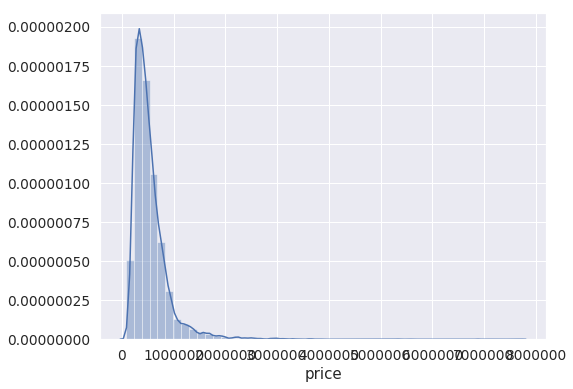

In [0]:
import seaborn as sns
f, ax = plt.subplots(figsize=(8,6))
sns.distplot(train['price'])
# 많이 한쪽으로 치우쳐있다

In [0]:
print('Skewness :{}'.format(train['price'].skew()))
print('Kurtosis :{}'.format(train['price'].kurt()))
# k는 첨도 : k가 3에 가까울 수록 정규분포에 가깝다

Skewness :4.290252396939529
Kurtosis :40.15491919350329


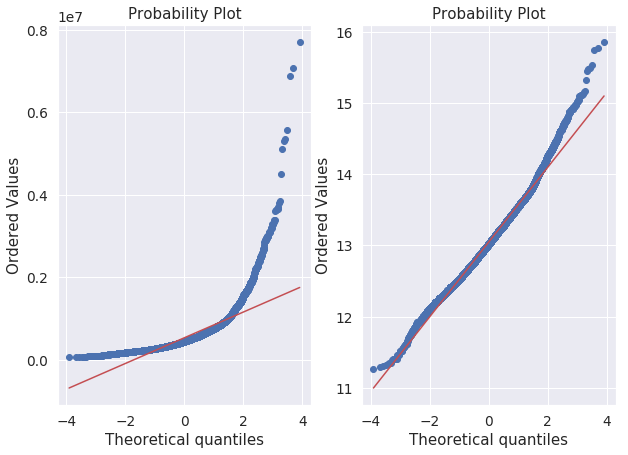

In [0]:
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

fig = plt.figure(figsize=(10,7))
fig.add_subplot(1,2,1)
res = stats.probplot(train['price'], plot=plt)
fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(train['price']), plot=plt)

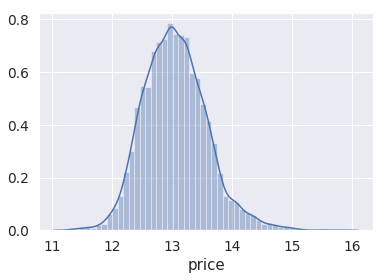

In [0]:
train['price'] = np.log1p(train['price'])
sns.distplot(train['price'])

In [0]:
import scipy as sp
cor_abs = abs(train.corr(method='spearman'))
cor_abs

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
id,1.000000,0.036892,0.013834,0.111903,0.043499,0.141132,0.173174,0.011775,0.027046,0.108179,0.091820,0.072526,0.043541,0.232404,0.029928,0.002220,0.001464,0.006746,0.019945,0.134385,0.013244,0.010136,0.002231
price,0.036892,1.000000,0.350185,0.498989,0.646482,0.080554,0.328674,0.113179,0.291720,0.021520,0.662125,0.547868,0.245304,0.097844,0.112381,0.009266,0.450692,0.071757,0.573777,0.065771,0.009247,0.016561,0.021072
bedrooms,0.013834,0.350185,1.000000,0.523963,0.649001,0.217457,0.233211,0.008354,0.079330,0.017853,0.386833,0.540893,0.229599,0.180364,0.020432,0.171497,0.022815,0.195264,0.445933,0.201626,0.003445,0.005709,0.010182
bathrooms,0.111903,0.498989,0.523963,1.000000,0.748612,0.068576,0.552080,0.058399,0.150776,0.163990,0.661112,0.695672,0.185469,0.564570,0.054849,0.206889,0.000765,0.267203,0.575235,0.062854,0.020950,0.006675,0.008071
sqft_living,0.043499,0.646482,0.649001,0.748612,1.000000,0.307893,0.408417,0.072606,0.227205,0.059271,0.717800,0.846081,0.322338,0.352702,0.059647,0.209218,0.025544,0.292975,0.748214,0.286527,0.018779,0.006739,0.006593
sqft_lot,0.141132,0.080554,0.217457,0.068576,0.307893,1.000000,0.235869,0.088030,0.118640,0.118165,0.156199,0.273142,0.039281,0.039857,0.006904,0.314217,0.118702,0.370170,0.360508,0.922681,0.002423,0.003301,0.010297
floors,0.173174,0.328674,0.233211,0.552080,0.408417,0.235869,1.000000,0.030272,0.020704,0.285500,0.504506,0.603085,0.268624,0.552612,0.015442,0.060686,0.024092,0.148882,0.311335,0.232303,0.020448,0.014813,0.008694
waterfront,0.011775,0.113179,0.008354,0.058399,0.072606,0.088030,0.030272,1.000000,0.275925,0.013258,0.065167,0.059075,0.047804,0.027922,0.102746,0.027449,0.020620,0.034079,0.077448,0.092373,0.002041,0.006053,0.014859
view,0.027046,0.291720,0.079330,0.150776,0.227205,0.118640,0.020704,0.275925,1.000000,0.050993,0.211469,0.140011,0.228426,0.075096,0.096765,0.082838,0.002462,0.100331,0.252132,0.115645,0.019611,0.018968,0.011505
condition,0.108179,0.021520,0.017853,0.163990,0.059271,0.118165,0.285500,0.013258,0.050993,1.000000,0.166075,0.153410,0.161675,0.398125,0.067214,0.023013,0.023420,0.089793,0.084724,0.118243,0.040617,0.017469,0.000448


In [0]:
cor_cols= cor_abs.nlargest(n=10, columns='price').index
cor_cols
# 높은거 10개뽑기

Index(['price', 'grade', 'sqft_living', 'sqft_living15', 'sqft_above',
       'bathrooms', 'lat', 'bedrooms', 'floors', 'view'],
      dtype='object')

In [0]:
np.array(sp.stats.spearmanr(train[cor_cols].values))[0]
# price와 corr이 높은 column 10개 뽑기

array([[ 1.00000000e+00,  6.62125256e-01,  6.46482431e-01,
         5.73777345e-01,  5.47867765e-01,  4.98988916e-01,
         4.50691696e-01,  3.50184916e-01,  3.28674116e-01,
         2.91719516e-01],
       [ 6.62125256e-01,  1.00000000e+00,  7.17799601e-01,
         6.65039030e-01,  7.15099945e-01,  6.61112311e-01,
         1.00037933e-01,  3.86833231e-01,  5.04506199e-01,
         2.11468857e-01],
       [ 6.46482431e-01,  7.17799601e-01,  1.00000000e+00,
         7.48213636e-01,  8.46081041e-01,  7.48612310e-01,
         2.55443864e-02,  6.49001466e-01,  4.08416554e-01,
         2.27205439e-01],
       [ 5.73777345e-01,  6.65039030e-01,  7.48213636e-01,
         1.00000000e+00,  6.99157749e-01,  5.75235493e-01,
         2.51542683e-02,  4.45932971e-01,  3.11335434e-01,
         2.52132180e-01],
       [ 5.47867765e-01,  7.15099945e-01,  8.46081041e-01,
         6.99157749e-01,  1.00000000e+00,  6.95671508e-01,
        -2.82371151e-02,  5.40892582e-01,  6.03085217e-01,
         1.

In [0]:
cor = np.array(sp.stats.spearmanr(train[cor_cols].values))[0]

In [0]:
print(cor_cols.values)

['price' 'grade' 'sqft_living' 'sqft_living15' 'sqft_above' 'bathrooms'
 'lat' 'bedrooms' 'floors' 'view']


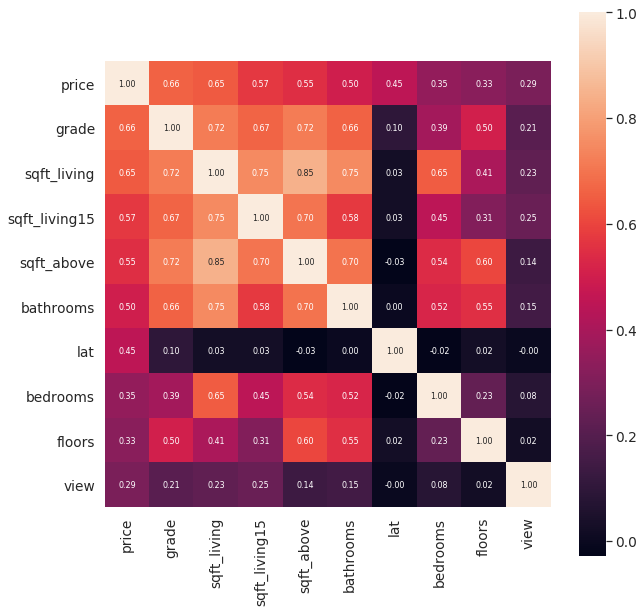

In [0]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True, annot_kws={'size':8},\
           xticklabels=cor_cols.values, yticklabels=cor_cols.values)

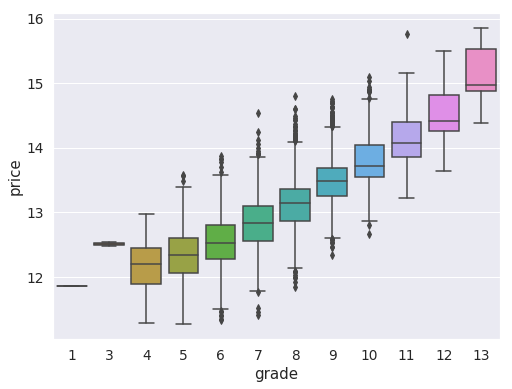

In [0]:
data = pd.concat([train['price'], train['grade']], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='grade', y='price', data=data)

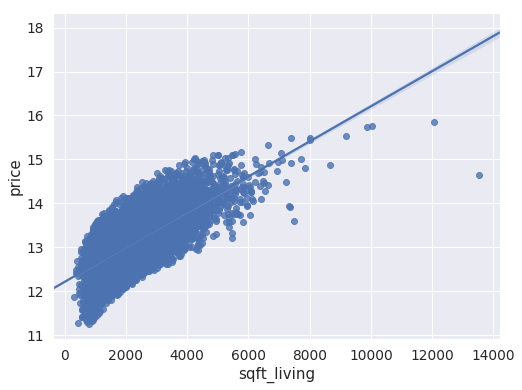

In [0]:
data = pd.concat([train['price'], train['sqft_living']], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.regplot(x='sqft_living', y='price', data=data)

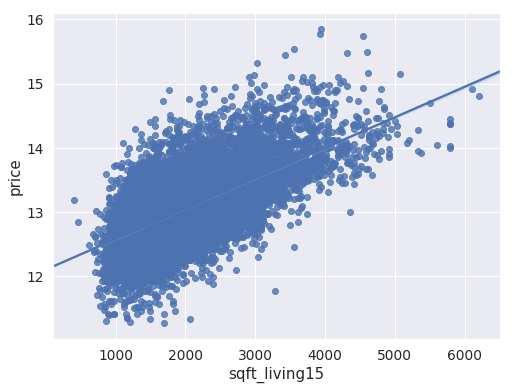

In [0]:
data = pd.concat([train['price'], train['sqft_living15']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='sqft_living15', y="price", data=data)

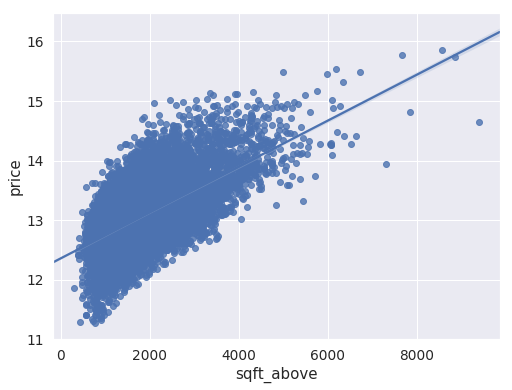

In [0]:
data = pd.concat([train['price'], train['sqft_above']], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.regplot(x='sqft_above', y='price', data=data)

In [0]:
data = pd.concat([train['price'], train['bathrooms']], axis=1)
data.head()

,price,bathrooms
0,12.309987,1.00
1,12.100718,1.00
2,13.142168,2.00
3,12.458779,2.25
4,12.583999,1.50


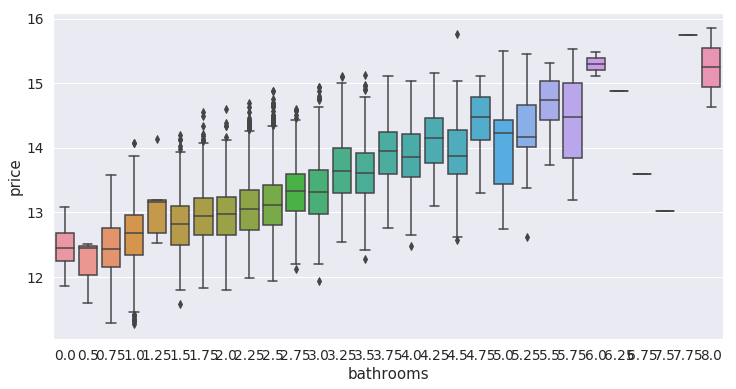

In [0]:
f, ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(x="bathrooms", y="price", data=data)

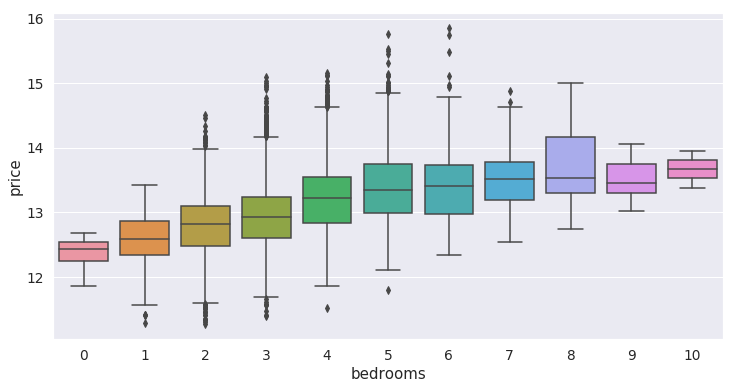

In [0]:
data = pd.concat([train['price'], train['bedrooms']], axis=1)
f, ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(x='bedrooms', y='price', data=data)

In [0]:
train['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

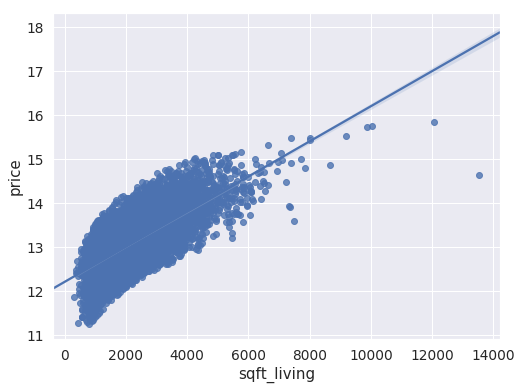

In [0]:
# 이상치 제거

data = pd.concat([train['price'], train['sqft_living']], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.regplot(x='sqft_living', y='price', data=data)

In [0]:
train.loc[train['sqft_living'] > 13000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,datetime,year,month,day
8912,8912,20140505T000000,14.639686,7,8.0,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,2014-05-05,2014,5,5


In [0]:
train = train.loc[train['id']!=8912]

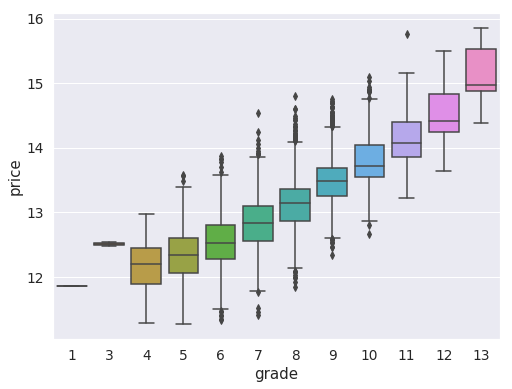

In [0]:
data = pd.concat([train['price'], train['grade']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='grade', y="price", data=data)

In [0]:
train.loc[(train['price']>12) & (train['grade'] == 3)]
# sqft

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,datetime,year,month,day
2302,2302,20150225T000000,12.476104,1,0.75,520,12981,1.0,0,0,5,3,520,0,1920,0,98022,47.2082,-121.995,1340,12233,2015-02-25,2015,2,25
4123,4123,20141104T000000,12.542548,1,0.00,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549,2014-11-04,2014,11,4


In [0]:
train[['grade','sqft_living','sqft_living15']].describe()
# 중요 변수인 grade, sqft 모두 위 두개는 낮은데 price는 높다? : 이상치

,grade,sqft_living,sqft_living15
count,15034.000000,15034.000000,15034.00000
mean,7.660436,2083.028203,1992.56472
std,1.179311,917.418561,691.08662
min,1.000000,290.000000,399.00000
25%,7.000000,1430.000000,1490.00000
50%,7.000000,1910.000000,1850.00000
75%,8.000000,2560.000000,2360.00000
max,13.000000,12050.000000,6210.00000


In [0]:
train.loc[(train['price'] > 14.7) & (train['grade'] == 8)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,datetime,year,month,day
7173,7173,20140813T000000,14.808763,5,4.0,4230,27295,2.0,1,4,3,8,3230,1000,1949,1985,98033,47.6803,-122.214,2660,27295,2014-08-13,2014,8,13


In [0]:
train.loc[(train['price']>15.5) & (train['grade'] == 11)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,datetime,year,month,day
2775,2775,20140611T000000,15.77031,5,4.5,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.65,-122.214,3930,25449,2014-06-11,2014,6,11


In [0]:
train = train.loc[train['id']!=456]
train = train.loc[train['id']!=2302]
train = train.loc[train['id']!=4123]
train = train.loc[train['id']!=7259]
train = train.loc[train['id']!=2777]

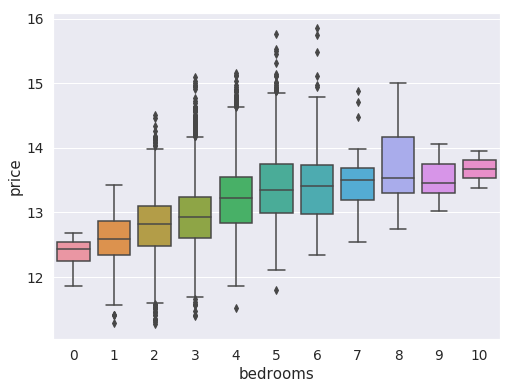

In [0]:
data = pd.concat([train['price'], train['bedrooms']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='bedrooms', y="price", data=data)

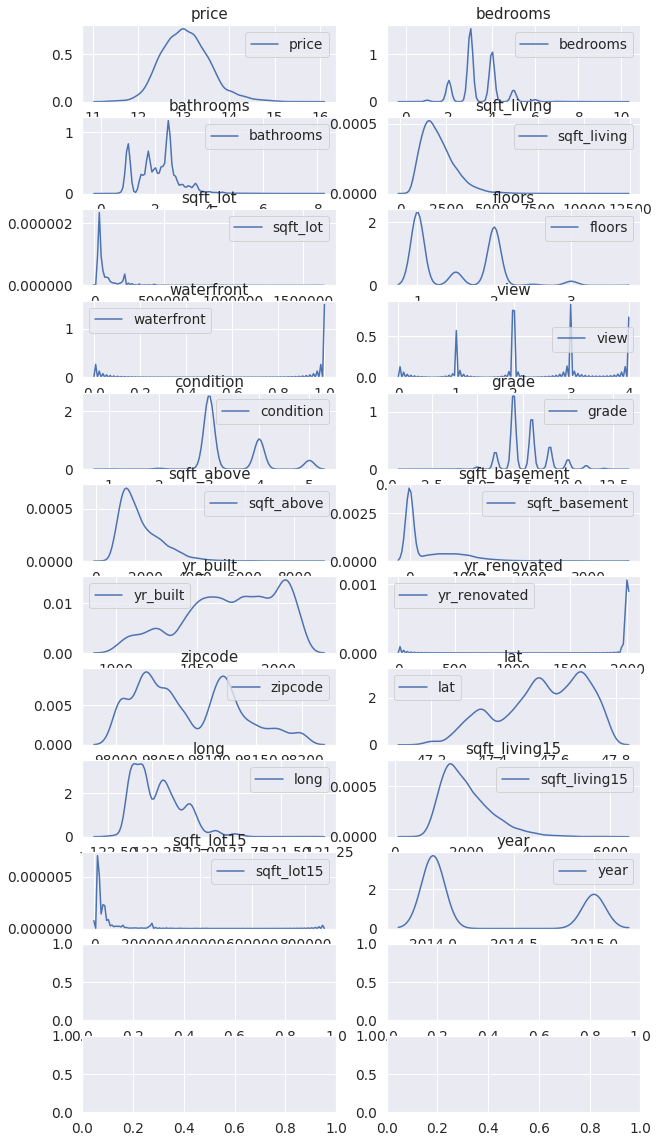

In [0]:
f, ax = plt.subplots(12, 2, figsize=(10,20))

# id 변수 제외
count = 0
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year',
       'month', 'day']
for row in range(12):
    for col in range(2):
        sns.kdeplot(train[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
    if count == 20:
        break

In [0]:
# 치우친 넘 : bedrooms, bathrooms, sqft_living, sqft_lot, sqft_above, sqft_basement

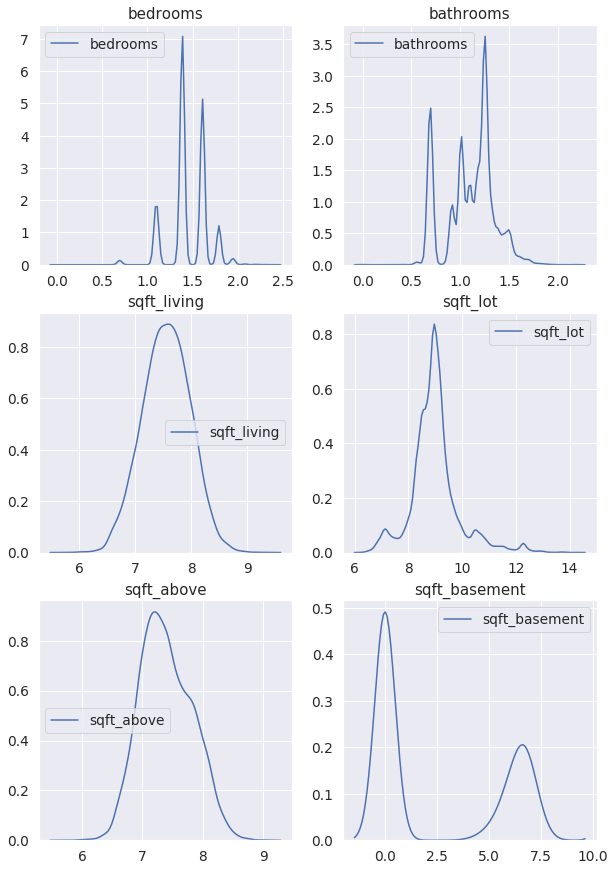

In [0]:
skew_columns = ['bedrooms', \
                'bathrooms', 'sqft_living', 'sqft_lot'\
                , 'sqft_above', 'sqft_basement']

for c in skew_columns:
    train[c] = np.log1p(train[c].values)

f, ax = plt.subplots(3,2, figsize=(10,15))

count = 0
for row in range(3):
    for col in range(2):
        if count == 6:
            break
        sns.kdeplot(train[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1

In [0]:
skew_columns = ['bedrooms', \
                'bathrooms', 'sqft_living', 'sqft_lot'\
                , 'sqft_above', 'sqft_basement']

for c in skew_columns:
    test[c] = np.log1p(test[c].values)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15029 entries, 0 to 15034
Data columns (total 25 columns):
id               15029 non-null int64
date             15029 non-null object
price            15029 non-null float64
bedrooms         15029 non-null float64
bathrooms        15029 non-null float64
sqft_living      15029 non-null float64
sqft_lot         15029 non-null float64
floors           15029 non-null float64
waterfront       15029 non-null int64
view             15029 non-null int64
condition        15029 non-null int64
grade            15029 non-null int64
sqft_above       15029 non-null float64
sqft_basement    15029 non-null float64
yr_built         15029 non-null int64
yr_renovated     15029 non-null int64
zipcode          15029 non-null int64
lat              15029 non-null float64
long             15029 non-null float64
sqft_living15    15029 non-null int64
sqft_lot15       15029 non-null int64
datetime         15029 non-null datetime64[ns]
year             15029 no

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 24 columns):
id               6468 non-null int64
date             6468 non-null object
bedrooms         6468 non-null float64
bathrooms        6468 non-null float64
sqft_living      6468 non-null float64
sqft_lot         6468 non-null float64
floors           6468 non-null float64
waterfront       6468 non-null int64
view             6468 non-null int64
condition        6468 non-null int64
grade            6468 non-null int64
sqft_above       6468 non-null float64
sqft_basement    6468 non-null float64
yr_built         6468 non-null int64
yr_renovated     6468 non-null int64
zipcode          6468 non-null int64
lat              6468 non-null float64
long             6468 non-null float64
sqft_living15    6468 non-null int64
sqft_lot15       6468 non-null int64
datetime         6468 non-null datetime64[ns]
year             6468 non-null int64
month            6468 non-null int64
day           

In [0]:
for df in [train,test]:
    df['yr_renovated'] = df['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)
    df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_built'])

In [0]:
for df in [train,test]:
    df['date'] = df['date'].apply(lambda x : x[0:8])

In [0]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,datetime,year,month,day
0,0,20141013,12.309987,1.386294,0.693147,7.074117,8.639588,1.0,0,0,3,7,7.074117,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650,2014-10-13,2014,10,13
1,1,20150225,12.100718,1.098612,0.693147,6.647688,9.210440,1.0,0,0,3,6,6.647688,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062,2015-02-25,2015,2,25
2,2,20150218,13.142168,1.386294,1.098612,7.427144,8.997271,1.0,0,0,3,8,7.427144,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503,2015-02-18,2015,2,18
3,3,20140627,12.458779,1.386294,1.178655,7.447751,8.827615,2.0,0,0,3,7,7.447751,0.0,1995,1995.0,98003,47.3097,-122.327,2238,6819,2014-06-27,2014,6,27
4,4,20150115,12.583999,1.386294,0.916291,6.966967,9.181118,1.0,0,0,3,7,6.966967,0.0,1963,1963.0,98198,47.4095,-122.315,1650,9711,2015-01-15,2015,1,15


In [0]:
for df in [train, test]:
    # 방 전체 갯수
    df['total_rooms'] = df['bedrooms'] + df['bathrooms']
    # 거실의 비율
    df['sqft_ratio'] = df['sqft_living'] / df['sqft_lot']
    df['sqft_total_size'] = df['sqft_above'] + df['sqft_basement']
    # 면적 대비 거실의 비율
    df['sqft_ratio_1'] = df['sqft_living'] / df['sqft_total_size']
    df['sqft_ratio15'] = df['sqft_living15'] / df['sqft_lot15']
    # 재건축 여부
    df['is_renovated'] = df['yr_renovated'] - df['yr_built']
    df['is_renovated'] = df['is_renovated'].apply(lambda x : 0 if x==0 else 1)
    df['date'] = df['date'].astype('int')

In [0]:
# zipcode 이용해서 feature engineering

train['per_price'] = train['price'] / train['sqft_total_size']
zipcode_price = train.groupby(['zipcode'])['per_price']\
            .agg({'mean','var'}).reset_index()

In [0]:
zipcode_price.head()

,zipcode,mean,var
0,98001,1.490736,0.110772
1,98002,1.559377,0.086592
2,98003,1.426763,0.135985
3,98004,1.425458,0.174417
4,98005,1.307652,0.162820


In [0]:
train = pd.merge(train, zipcode_price, how='left', on='zipcode')
test = pd.merge(test, zipcode_price, how='left', on='zipcode')

for df in [train, test]:
    df['zipcode_mean'] = df['mean'] * df['sqft_total_size']
    df['zipcode_var'] = df['var'] * df['sqft_total_size']
    del df['mean']
    del df['var']

In [0]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,datetime,year,month,day,total_rooms,sqft_ratio,sqft_total_size,sqft_ratio_1,sqft_ratio15,is_renovated,per_price,zipcode_mean,zipcode_var
0,0,20141013,12.309987,1.386294,0.693147,7.074117,8.639588,1.0,0,0,3,7,7.074117,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650,2014-10-13,2014,10,13,2.079442,0.818803,7.074117,1.0,0.237168,0,1.740145,9.368147,1.214207
1,1,20150225,12.100718,1.098612,0.693147,6.647688,9.210440,1.0,0,0,3,6,6.647688,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062,2015-02-25,2015,2,25,1.791759,0.721756,6.647688,1.0,0.337385,0,1.820290,9.257745,1.023549
2,2,20150218,13.142168,1.386294,1.098612,7.427144,8.997271,1.0,0,0,3,8,7.427144,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503,2015-02-18,2015,2,18,2.484907,0.825489,7.427144,1.0,0.239904,0,1.769478,11.307711,0.826257
3,3,20140627,12.458779,1.386294,1.178655,7.447751,8.827615,2.0,0,0,3,7,7.447751,0.0,1995,1995.0,98003,47.3097,-122.327,2238,6819,2014-06-27,2014,6,27,2.564949,0.843688,7.447751,1.0,0.328201,0,1.672824,10.626177,1.012780
4,4,20150115,12.583999,1.386294,0.916291,6.966967,9.181118,1.0,0,0,3,7,6.966967,0.0,1963,1963.0,98198,47.4095,-122.315,1650,9711,2015-01-15,2015,1,15,2.302585,0.758837,6.966967,1.0,0.169910,0,1.806238,10.032009,1.002206


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15029 entries, 0 to 15028
Data columns (total 34 columns):
id                 15029 non-null int64
date               15029 non-null int64
price              15029 non-null float64
bedrooms           15029 non-null float64
bathrooms          15029 non-null float64
sqft_living        15029 non-null float64
sqft_lot           15029 non-null float64
floors             15029 non-null float64
waterfront         15029 non-null int64
view               15029 non-null int64
condition          15029 non-null int64
grade              15029 non-null int64
sqft_above         15029 non-null float64
sqft_basement      15029 non-null float64
yr_built           15029 non-null int64
yr_renovated       15029 non-null float64
zipcode            15029 non-null int64
lat                15029 non-null float64
long               15029 non-null float64
sqft_living15      15029 non-null int64
sqft_lot15         15029 non-null int64
datetime           15029 non-

In [0]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'datetime', 'year',
       'month', 'day', 'total_rooms', 'sqft_ratio', 'sqft_total_size',
       'sqft_ratio_1', 'sqft_ratio15', 'is_renovated', 'per_price',
       'zipcode_mean', 'zipcode_var'],
      dtype='object')

In [0]:
cols_train = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 
       'total_rooms', 'sqft_ratio', 'sqft_total_size',
       'sqft_ratio_1', 'sqft_ratio15', 'is_renovated',
       'zipcode_mean', 'zipcode_var']

In [0]:
train[cols_train].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_rooms,sqft_ratio,sqft_total_size,sqft_ratio_1,sqft_ratio15,is_renovated,zipcode_mean,zipcode_var
count,15029.000000,15029.000000,15029.000000,15029.000000,15029.000000,15029.000000,15029.000000,15029.000000,15029.000000,15029.000000,15029.000000,15029.000000,15029.000000,15029.000000,15029.000000,15029.000000,15029.000000,15029.000000,15029.000000,15029.000000,15029.000000,15029.000000,15029.000000,15029.000000,15029.000000,15029.000000
mean,1.452970,1.105507,7.552393,8.992507,1.498070,0.007120,0.234081,3.406680,7.661055,7.398157,2.521453,1971.104864,1973.451860,98078.036729,47.560741,-122.213751,1992.694657,12810.814292,2.558477,0.846431,9.919610,0.827651,0.307864,0.041919,14.125610,1.382602
std,0.210576,0.250586,0.425182,0.905421,0.538413,0.084079,0.762898,0.646358,1.178206,0.429019,3.166501,29.408754,28.897191,53.303120,0.138155,0.141194,691.084366,27691.103765,0.404911,0.079605,3.111916,0.214918,0.224908,0.200411,4.211421,0.620996
min,0.000000,0.000000,5.673323,6.255750,1.000000,0.000000,0.000000,1.000000,1.000000,5.673323,0.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.485142,5.673323,0.542840,0.001449,0.000000,7.679645,0.296675
25%,1.386294,1.011601,7.266129,8.522778,1.000000,0.000000,0.000000,3.000000,7.000000,7.082549,0.000000,1951.000000,1954.000000,98033.000000,47.472700,-122.328000,1490.000000,5100.000000,2.302585,0.798841,7.359468,0.559014,0.173810,0.000000,10.643946,0.928701
50%,1.386294,1.178655,7.555382,8.938663,1.500000,0.000000,0.000000,3.000000,7.000000,7.359468,0.000000,1975.000000,1978.000000,98065.000000,47.571900,-122.231000,1850.000000,7609.000000,2.621039,0.844409,7.908755,1.000000,0.246926,0.000000,12.068375,1.197693
75%,1.609438,1.252763,7.848153,9.277064,2.000000,0.000000,0.000000,4.000000,8.000000,7.710205,6.311735,1997.000000,1999.000000,98117.000000,47.678400,-122.126000,2360.000000,10075.000000,2.862201,0.896304,13.467910,1.000000,0.379221,0.000000,18.409966,2.032193
max,2.397895,2.197225,9.396903,14.317110,3.500000,1.000000,4.000000,5.000000,13.000000,9.089415,8.155075,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,4.442651,1.245564,17.211215,1.000000,2.241814,1.000000,25.991591,2.963357


In [0]:
train[cols_train].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15029 entries, 0 to 15028
Data columns (total 26 columns):
bedrooms           15029 non-null float64
bathrooms          15029 non-null float64
sqft_living        15029 non-null float64
sqft_lot           15029 non-null float64
floors             15029 non-null float64
waterfront         15029 non-null int64
view               15029 non-null int64
condition          15029 non-null int64
grade              15029 non-null int64
sqft_above         15029 non-null float64
sqft_basement      15029 non-null float64
yr_built           15029 non-null int64
yr_renovated       15029 non-null float64
zipcode            15029 non-null int64
lat                15029 non-null float64
long               15029 non-null float64
sqft_living15      15029 non-null int64
sqft_lot15         15029 non-null int64
total_rooms        15029 non-null float64
sqft_ratio         15029 non-null float64
sqft_total_size    15029 non-null float64
sqft_ratio_1       15029 

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

rScaler = RobustScaler()
sScaler = StandardScaler()
mScaler = MinMaxScaler()
rScaler.fit_transform(train[cols_train])

array([[ 0.        , -2.01320151, -0.82688149, ...,  0.        ,
        -0.3476978 ,  0.01496545],
       [-1.28922423, -2.01320151, -1.55954581, ...,  0.        ,
        -0.36191386, -0.1578112 ],
       [ 0.        , -0.33190423, -0.22033068, ...,  0.        ,
        -0.0979478 , -0.33659995],
       ...,
       [ 0.        ,  0.30729532, -0.38092146, ...,  0.        ,
        -0.13259199,  0.00460435],
       [ 1.        ,  0.30729532,  0.32653905, ...,  0.        ,
        -0.09979286, -0.02194453],
       [-1.28922423, -2.56690135, -1.07700678, ...,  0.        ,
        -0.42364838, -0.09083226]])

In [0]:
mScaler.fit_transform(train[cols_train])

array([[0.57812965, 0.31546488, 0.3761954 , ..., 0.        , 0.0922077 ,
        0.34407248],
       [0.45815691, 0.31546488, 0.2616743 , ..., 0.        , 0.08617872,
        0.27257629],
       [0.57812965, 0.5       , 0.47100399, ..., 0.        , 0.19812563,
        0.19859225],
       ...,
       [0.57812965, 0.570157  , 0.44590241, ..., 0.        , 0.18343317,
        0.33978498],
       [0.67118774, 0.570157  , 0.55648396, ..., 0.        , 0.19734315,
        0.32879887],
       [0.45815691, 0.25469212, 0.33709889, ..., 0.        , 0.05999737,
        0.30029264]])

In [0]:
sScaler.fit_transform(train[cols_train])

array([[-0.31664504, -1.64563658, -1.12491032, ..., -0.20917227,
        -1.12969501, -0.27117818],
       [-1.68285783, -1.64563658, -2.12787525, ..., -0.20917227,
        -1.15591084, -0.5782073 ],
       [-0.31664504, -0.02751484, -0.29458573, ..., -0.20917227,
        -0.6691312 , -0.8959201 ],
       ...,
       [-0.31664504,  0.5876665 , -0.51442299, ..., -0.20917227,
        -0.73301853, -0.28959014],
       [ 0.74307192,  0.5876665 ,  0.45403974, ..., -0.20917227,
        -0.67253367, -0.33676827],
       [-1.68285783, -2.1785309 , -1.46731391, ..., -0.20917227,
        -1.26975543, -0.45918378]])

In [0]:
# cols_category = ['bedrooms', 'bathrooms', 'sqft_living',
#        'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
#        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
#        'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year',
#        'month', 'day', 'total_rooms', 'sqft_ratio', 'sqft_total_size',
#        'sqft_ratio_1', 'sqft_ratio15', 'is_renovated', 'per_price',
#        'zipcode_mean', 'zipcode_var']

In [0]:
train_label = train['price']
train_label = train_label.values.reshape(-1,1)
train_label.shape

(15029, 1)

In [0]:
train[['price']]

,price
0,12.309987
1,12.100718
2,13.142168
3,12.458779
4,12.583999
5,13.403777
6,13.056226
7,12.644331
8,12.899222
9,13.180634


In [0]:
mScaler.fit_transform(train[cols_train]).shape

(15029, 26)

In [0]:
test[cols_train].values.shape

(6468, 26)

In [0]:
x_real_data = test[cols_train]
x_real_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_rooms,sqft_ratio,sqft_total_size,sqft_ratio_1,sqft_ratio15,is_renovated,zipcode_mean,zipcode_var
0,1.386294,1.178655,7.852050,8.887791,2.0,0,0,3,7,7.682943,5.993961,1951,1991.0,98125,47.7210,-122.319,1690,7639,2.564949,0.883465,13.676905,0.574110,0.221233,1,19.243241,2.317027
1,1.609438,1.386294,7.581210,8.517393,1.0,0,0,5,7,6.957497,6.814543,1965,1965.0,98136,47.5208,-122.393,1360,5000,2.995732,0.890086,13.772040,0.550478,0.272000,0,18.113257,2.389816
2,1.609438,1.704748,8.598036,11.532051,1.0,0,0,3,11,8.266421,7.333676,2001,2001.0,98053,47.6561,-122.005,4760,101930,3.314186,0.745577,15.600098,0.551153,0.046699,0,25.917920,0.737584
3,1.386294,0.693147,7.484930,8.918784,1.0,0,0,3,7,6.957497,6.594413,1960,1960.0,98146,47.5123,-122.337,1780,8113,2.079442,0.839232,13.551911,0.552315,0.219401,0,19.759625,2.053191
4,1.386294,1.252763,7.544861,8.788898,2.0,0,0,3,7,7.544861,0.000000,2003,2003.0,98038,47.3684,-122.031,2390,7570,2.639057,0.858454,7.544861,1.000000,0.315720,0,11.947244,0.477170
5,1.791759,1.252763,7.727976,8.748464,2.0,0,0,3,8,7.727976,0.000000,1995,1995.0,98092,47.3266,-122.169,2240,7005,3.044522,0.883352,7.727976,1.000000,0.319772,0,11.812116,0.663187
6,1.386294,1.011601,7.327123,8.761080,1.0,0,0,3,7,6.673298,6.594413,1948,1948.0,98115,47.6950,-122.304,1520,6235,2.397895,0.836326,13.267711,0.552252,0.243785,0,17.129307,2.206809
7,1.609438,1.252763,7.852050,8.878219,2.0,0,0,3,8,7.852050,0.000000,2005,2005.0,98052,47.7073,-122.110,2630,6026,2.862201,0.884417,7.852050,1.000000,0.436442,0,11.480668,1.079471
8,1.098612,0.916291,7.082549,7.143618,3.0,0,0,3,7,7.082549,0.000000,2005,2005.0,98133,47.7274,-122.357,1390,1756,2.014903,0.991451,7.082549,1.000000,0.791572,0,10.405365,1.129948
9,1.609438,0.693147,7.415175,10.458780,1.0,0,0,1,5,6.836259,6.594413,1933,1933.0,98052,47.6621,-122.132,2160,11467,2.302585,0.708990,13.430673,0.552107,0.188367,0,19.637304,1.846399


In [0]:
xdata = mScaler.fit_transform(train[cols_train])
ydata = train_label

In [0]:
xdata.shape

(15029, 26)

In [0]:
ydata.shape

(15029, 1)

In [0]:
x_real_data.shape

(6468, 26)

In [0]:
x_real_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_rooms,sqft_ratio,sqft_total_size,sqft_ratio_1,sqft_ratio15,is_renovated,zipcode_mean,zipcode_var
0,1.386294,1.178655,7.852050,8.887791,2.0,0,0,3,7,7.682943,5.993961,1951,1991.0,98125,47.7210,-122.319,1690,7639,2.564949,0.883465,13.676905,0.574110,0.221233,1,19.243241,2.317027
1,1.609438,1.386294,7.581210,8.517393,1.0,0,0,5,7,6.957497,6.814543,1965,1965.0,98136,47.5208,-122.393,1360,5000,2.995732,0.890086,13.772040,0.550478,0.272000,0,18.113257,2.389816
2,1.609438,1.704748,8.598036,11.532051,1.0,0,0,3,11,8.266421,7.333676,2001,2001.0,98053,47.6561,-122.005,4760,101930,3.314186,0.745577,15.600098,0.551153,0.046699,0,25.917920,0.737584
3,1.386294,0.693147,7.484930,8.918784,1.0,0,0,3,7,6.957497,6.594413,1960,1960.0,98146,47.5123,-122.337,1780,8113,2.079442,0.839232,13.551911,0.552315,0.219401,0,19.759625,2.053191
4,1.386294,1.252763,7.544861,8.788898,2.0,0,0,3,7,7.544861,0.000000,2003,2003.0,98038,47.3684,-122.031,2390,7570,2.639057,0.858454,7.544861,1.000000,0.315720,0,11.947244,0.477170
5,1.791759,1.252763,7.727976,8.748464,2.0,0,0,3,8,7.727976,0.000000,1995,1995.0,98092,47.3266,-122.169,2240,7005,3.044522,0.883352,7.727976,1.000000,0.319772,0,11.812116,0.663187
6,1.386294,1.011601,7.327123,8.761080,1.0,0,0,3,7,6.673298,6.594413,1948,1948.0,98115,47.6950,-122.304,1520,6235,2.397895,0.836326,13.267711,0.552252,0.243785,0,17.129307,2.206809
7,1.609438,1.252763,7.852050,8.878219,2.0,0,0,3,8,7.852050,0.000000,2005,2005.0,98052,47.7073,-122.110,2630,6026,2.862201,0.884417,7.852050,1.000000,0.436442,0,11.480668,1.079471
8,1.098612,0.916291,7.082549,7.143618,3.0,0,0,3,7,7.082549,0.000000,2005,2005.0,98133,47.7274,-122.357,1390,1756,2.014903,0.991451,7.082549,1.000000,0.791572,0,10.405365,1.129948
9,1.609438,0.693147,7.415175,10.458780,1.0,0,0,1,5,6.836259,6.594413,1933,1933.0,98052,47.6621,-122.132,2160,11467,2.302585,0.708990,13.430673,0.552107,0.188367,0,19.637304,1.846399


In [0]:
x_real_data_scaled = mScaler.fit_transform(x_real_data)

In [0]:
x_real_data_scaled

array([[0.39312326, 0.57560146, 0.59425994, ..., 1.        , 0.63150962,
        0.8098944 ],
       [0.45640198, 0.67700308, 0.5111183 , ..., 0.        , 0.56912639,
        0.83964101],
       [0.45640198, 0.83252139, 0.82325994, ..., 0.        , 1.        ,
        0.16441773],
       ...,
       [0.39312326, 0.61179242, 0.3875098 , ..., 0.        , 0.4178486 ,
        0.65889356],
       [0.31154282, 0.27329088, 0.31076332, ..., 0.        , 0.05377023,
        0.31148957],
       [0.39312326, 0.61179242, 0.44885545, ..., 0.        , 0.10599093,
        0.32111149]])

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(xdata,ydata)

In [0]:
xtrain.shape

(11271, 26)

In [0]:
xdata_raw = train[cols_train]
xdata_raw

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_rooms,sqft_ratio,sqft_total_size,sqft_ratio_1,sqft_ratio15,is_renovated,zipcode_mean,zipcode_var
0,1.386294,0.693147,7.074117,8.639588,1.0,0,0,3,7,7.074117,0.000000,1955,1955.0,98178,47.5112,-122.257,1340,5650,2.079442,0.818803,7.074117,1.000000,0.237168,0,9.368147,1.214207
1,1.098612,0.693147,6.647688,9.210440,1.0,0,0,3,6,6.647688,0.000000,1933,1933.0,98028,47.7379,-122.233,2720,8062,1.791759,0.721756,6.647688,1.000000,0.337385,0,9.257745,1.023549
2,1.386294,1.098612,7.427144,8.997271,1.0,0,0,3,8,7.427144,0.000000,1987,1987.0,98074,47.6168,-122.045,1800,7503,2.484907,0.825489,7.427144,1.000000,0.239904,0,11.307711,0.826257
3,1.386294,1.178655,7.447751,8.827615,2.0,0,0,3,7,7.447751,0.000000,1995,1995.0,98003,47.3097,-122.327,2238,6819,2.564949,0.843688,7.447751,1.000000,0.328201,0,10.626177,1.012780
4,1.386294,0.916291,6.966967,9.181118,1.0,0,0,3,7,6.966967,0.000000,1963,1963.0,98198,47.4095,-122.315,1650,9711,2.302585,0.758837,6.966967,1.000000,0.169910,0,10.032009,1.002206
5,1.386294,1.252763,8.177797,9.189831,1.0,0,0,3,8,7.528869,7.438972,1965,1965.0,98007,47.6007,-122.145,2210,8925,2.639057,0.889874,14.967841,0.546358,0.247619,0,22.185816,2.235851
6,1.098612,0.693147,7.057037,8.699681,1.0,0,0,4,7,6.758095,5.707110,1942,1942.0,98115,47.6900,-122.292,1330,6000,1.791759,0.811183,12.465205,0.566139,0.221667,0,16.093229,2.073329
7,1.386294,0.693147,7.266129,9.898576,1.5,0,0,4,7,7.266129,0.000000,1927,1927.0,98028,47.7558,-122.229,1780,12697,2.079442,0.734058,7.266129,1.000000,0.140191,0,10.119001,1.118771
8,1.386294,1.011601,7.223296,9.177920,1.0,0,0,4,7,7.223296,0.000000,1977,1977.0,98074,47.6127,-122.045,1370,10208,2.397895,0.787030,7.223296,1.000000,0.134208,0,10.997355,0.803580
9,1.791759,1.098612,7.501634,8.486940,1.5,0,0,3,7,7.501634,0.000000,1900,1900.0,98107,47.6700,-122.394,1360,4850,2.890372,0.883903,7.501634,1.000000,0.280412,0,10.884515,1.290916


In [0]:
xdata_raw_val = xdata_raw.values
xdata_raw_val

array([[ 1.38629436,  0.69314718,  7.07411682, ...,  0.        ,
         9.3681473 ,  1.21420689],
       [ 1.09861229,  0.69314718,  6.64768837, ...,  0.        ,
         9.25774506,  1.02354934],
       [ 1.38629436,  1.09861229,  7.42714413, ...,  0.        ,
        11.30771075,  0.82625748],
       ...,
       [ 1.38629436,  1.25276297,  7.3336764 , ...,  0.        ,
        11.03866329,  1.20277351],
       [ 1.60943791,  1.25276297,  7.74543561, ...,  0.        ,
        11.29338199,  1.17347705],
       [ 1.09861229,  0.55961579,  6.92853782, ...,  0.        ,
         8.77831356,  1.09746002]])

In [0]:
ydata_val = ydata

In [0]:
x_real_data_val = x_real_data

In [0]:
type(xtrain)

numpy.ndarray

In [0]:
type(ytrain)

numpy.ndarray

In [0]:
type(xtest)

numpy.ndarray

In [0]:
type(ytest)

numpy.ndarray

In [0]:
pred = None

In [0]:
x = tf.placeholder(dtype=tf.float32, shape=[None,29])
y = tf.placeholder(dtype=tf.float32, shape=[None,1])
w1 = tf.Variable(tf.random_normal([29,20]))
b1 = tf.Variable(tf.random_normal([20]))
hl1 = tf.nn.relu(tf.matmul(x,w1) + b1)

w2 = tf.Variable(tf.random_normal([20,20]))
b2 = tf.Variable(tf.random_normal([20]))
hl2 = tf.nn.relu(tf.matmul(hl1,w2) + b2)

w3 = tf.Variable(tf.random_normal([20,20]))
b3 = tf.Variable(tf.random_normal([20]))
hl3 = tf.nn.relu(tf.matmul(hl2,w3) + b3)

w4 = tf.Variable(tf.random_normal([20,10]))
b4 = tf.Variable(tf.random_normal([10]))
hl4 = tf.nn.relu(tf.matmul(hl3,w4) + b4)

w5 = tf.Variable(tf.random_normal([10,1]))
b5 = tf.Variable(tf.random_normal([1]))
hf = tf.matmul(hl4,w5) + b5

cost = tf.reduce_mean(tf.square(hf-y))
train_ = tf.train.AdamOptimizer(0.1).minimize(cost)

In [0]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for step in range(2001):
        sess.run(train_, feed_dict={x:xtrain,y:ytrain})
        if step%200==0:
            print("cost : {}".format(sess.run(cost, feed_dict={x:xtrain,y:ytrain})))
    pred = sess.run(hf, feed_dict={x:xtest})

In [0]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, pred)
print(mse)

In [0]:
training = tf.placeholder_with_defalut(False, shape=())

x = tf.placeholder(dtype=tf.float32, shape=[None,29])
y = tf.placeholder(dtype=tf.float32, shape=[None,1])
w1 = tf.Variable(tf.random_normal([29,500], seed=1))
b1 = tf.Variable(tf.random_normal([500], seed=1))
hl1 = tf.nn.relu(tf.matmul(x,w1) + b1)

w2 = tf.Variable(tf.random_normal([500,500], seed=1))
b2 = tf.Variable(tf.random_normal([500], seed=1))
hl2 = tf.nn.relu(tf.matmul(hl1,w2) + b2)

w3 = tf.Variable(tf.random_normal([500,500], seed=1))
b3 = tf.Variable(tf.random_normal([500], seed=1))
hl3 = tf.nn.relu(tf.matmul(hl2,w3) + b3)

w4 = tf.Variable(tf.random_normal([500,50], seed=1))
b4 = tf.Variable(tf.random_normal([50], seed=1))
hl4 = tf.nn.relu(tf.matmul(hl3,w4) + b4)

w5 = tf.Variable(tf.random_normal([50,25], seed=1))
b5 = tf.Variable(tf.random_normal([25], seed=1))
hl5 = tf.nn.relu(tf.matmul(hl4,w5) + b5)

w6 = tf.Variable(tf.random_normal([25,1], seed=1))
b6 = tf.Variable(tf.random_normal([1], seed=1))
hf = tf.matmul(hl5,w6) + b6

cost = tf.reduce_mean(tf.square(hf-y))
train_ = tf.train.AdamOptimizer(0.1).minimize(cost)

In [0]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for step in range(6001):
        sess.run(train_, feed_dict={x:xtrain,y:ytrain})
        if step%600==0:
            print("cost : {}".format(sess.run(cost, feed_dict={x:xdata,y:ydata})))
    pred = sess.run(hf, feed_dict={x:x_real_data})

In [0]:
pd.DataFrame(pred).head()

In [0]:
print(pred.min(), pred.max(), pred.mean())

In [0]:
pd.DataFrame(train_label).head()

In [0]:
train_label

array([[12.30998662],
       [12.10071769],
       [13.14216797],
       ...,
       [12.79386209],
       [12.89922233],
       [12.69158354]])

In [0]:
xdata_for_nn = xdata_raw.copy()
xdata_for_nn.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_rooms,sqft_ratio,sqft_total_size,sqft_ratio_1,sqft_ratio15,is_renovated,zipcode_mean,zipcode_var
0,1.386294,0.693147,7.074117,8.639588,1.0,0,0,3,7,7.074117,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650,2.079442,0.818803,7.074117,1.0,0.237168,0,9.368147,1.214207
1,1.098612,0.693147,6.647688,9.210440,1.0,0,0,3,6,6.647688,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062,1.791759,0.721756,6.647688,1.0,0.337385,0,9.257745,1.023549
2,1.386294,1.098612,7.427144,8.997271,1.0,0,0,3,8,7.427144,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503,2.484907,0.825489,7.427144,1.0,0.239904,0,11.307711,0.826257
3,1.386294,1.178655,7.447751,8.827615,2.0,0,0,3,7,7.447751,0.0,1995,1995.0,98003,47.3097,-122.327,2238,6819,2.564949,0.843688,7.447751,1.0,0.328201,0,10.626177,1.012780
4,1.386294,0.916291,6.966967,9.181118,1.0,0,0,3,7,6.966967,0.0,1963,1963.0,98198,47.4095,-122.315,1650,9711,2.302585,0.758837,6.966967,1.0,0.169910,0,10.032009,1.002206


In [0]:
x_real_data_for_nn = x_real_data.copy()
x_real_data_for_nn.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_rooms,sqft_ratio,sqft_total_size,sqft_ratio_1,sqft_ratio15,is_renovated,zipcode_mean,zipcode_var
0,1.386294,1.178655,7.852050,8.887791,2.0,0,0,3,7,7.682943,5.993961,1951,1991.0,98125,47.7210,-122.319,1690,7639,2.564949,0.883465,13.676905,0.574110,0.221233,1,19.243241,2.317027
1,1.609438,1.386294,7.581210,8.517393,1.0,0,0,5,7,6.957497,6.814543,1965,1965.0,98136,47.5208,-122.393,1360,5000,2.995732,0.890086,13.772040,0.550478,0.272000,0,18.113257,2.389816
2,1.609438,1.704748,8.598036,11.532051,1.0,0,0,3,11,8.266421,7.333676,2001,2001.0,98053,47.6561,-122.005,4760,101930,3.314186,0.745577,15.600098,0.551153,0.046699,0,25.917920,0.737584
3,1.386294,0.693147,7.484930,8.918784,1.0,0,0,3,7,6.957497,6.594413,1960,1960.0,98146,47.5123,-122.337,1780,8113,2.079442,0.839232,13.551911,0.552315,0.219401,0,19.759625,2.053191
4,1.386294,1.252763,7.544861,8.788898,2.0,0,0,3,7,7.544861,0.000000,2003,2003.0,98038,47.3684,-122.031,2390,7570,2.639057,0.858454,7.544861,1.000000,0.315720,0,11.947244,0.477170


In [0]:
xdata_for_nn.shape

(15029, 26)

In [0]:
x_real_data_for_nn.shape

(6468, 26)

In [0]:
xdata_for_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15029 entries, 0 to 15028
Data columns (total 26 columns):
bedrooms           15029 non-null float64
bathrooms          15029 non-null float64
sqft_living        15029 non-null float64
sqft_lot           15029 non-null float64
floors             15029 non-null category
waterfront         15029 non-null category
view               15029 non-null category
condition          15029 non-null category
grade              15029 non-null category
sqft_above         15029 non-null float64
sqft_basement      15029 non-null float64
yr_built           15029 non-null int64
yr_renovated       15029 non-null category
zipcode            15029 non-null category
lat                15029 non-null float64
long               15029 non-null float64
sqft_living15      15029 non-null int64
sqft_lot15         15029 non-null int64
total_rooms        15029 non-null category
sqft_ratio         15029 non-null float64
sqft_total_size    15029 non-null float64
sqft_ra

In [0]:
x_real_data_for_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 0 to 6467
Data columns (total 26 columns):
bedrooms           6468 non-null float64
bathrooms          6468 non-null float64
sqft_living        6468 non-null float64
sqft_lot           6468 non-null float64
floors             6468 non-null category
waterfront         6468 non-null category
view               6468 non-null category
condition          6468 non-null category
grade              6468 non-null category
sqft_above         6468 non-null float64
sqft_basement      6468 non-null float64
yr_built           6468 non-null int64
yr_renovated       6468 non-null category
zipcode            6468 non-null category
lat                6468 non-null float64
long               6468 non-null float64
sqft_living15      6468 non-null int64
sqft_lot15         6468 non-null int64
total_rooms        6468 non-null category
sqft_ratio         6468 non-null float64
sqft_total_size    6468 non-null float64
sqft_ratio_1       6468 non-nu

In [0]:
xdata

array([[0.57812965, 0.31546488, 0.3761954 , ..., 0.        , 0.0922077 ,
        0.34407248],
       [0.45815691, 0.31546488, 0.2616743 , ..., 0.        , 0.08617872,
        0.27257629],
       [0.57812965, 0.5       , 0.47100399, ..., 0.        , 0.19812563,
        0.19859225],
       ...,
       [0.57812965, 0.570157  , 0.44590241, ..., 0.        , 0.18343317,
        0.33978498],
       [0.67118774, 0.570157  , 0.55648396, ..., 0.        , 0.19734315,
        0.32879887],
       [0.45815691, 0.25469212, 0.33709889, ..., 0.        , 0.05999737,
        0.30029264]])

In [0]:
xdata_for_nn.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'total_rooms', 'sqft_ratio',
       'sqft_total_size', 'sqft_ratio_1', 'sqft_ratio15', 'is_renovated',
       'zipcode_mean', 'zipcode_var'],
      dtype='object')

In [0]:
catlist = ['floors', 'waterfront', 'view', 'condition', 'grade', 'is_renovated']

In [0]:
for cat in catlist:
  print(xdata_for_nn[cat].value_counts())
  print(x_real_data_for_nn[cat].value_counts())

1.0    7357
2.0    5809
1.5    1330
3.0     416
2.5     113
3.5       4
Name: floors, dtype: int64
1.0    3251
2.0    2406
1.5     565
3.0     194
2.5      48
3.5       4
Name: floors, dtype: int64
0    14922
1      107
Name: waterfront, dtype: int64
0    6412
1      56
Name: waterfront, dtype: int64
0    13543
2      665
3      373
1      241
4      207
Name: view, dtype: int64
0    5837
2     297
3     134
4     109
1      91
Name: view, dtype: int64
3    9790
4    3955
5    1154
2     109
1      21
Name: condition, dtype: int64
3    4168
4    1701
5     534
2      57
1       8
Name: condition, dtype: int64
7     6226
8     4207
9     1854
6     1406
10     781
11     288
5      174
12      60
4       23
13       9
1        1
Name: grade, dtype: int64
7     2701
8     1843
9      754
6      611
10     350
11     108
5       62
12      28
4        6
13       4
3        1
Name: grade, dtype: int64
0    14399
1      630
Name: is_renovated, dtype: int64
0    6186
1     282
Name: is_renov

In [0]:
for df in [xdata_for_nn, x_real_data_for_nn]:
  for cat in catlist:
    df[cat] = df[cat].astype('category')

In [0]:
xdata_for_nn_input = pd.get_dummies(xdata_for_nn).values
x_real_data_for_nn_input = pd.get_dummies(x_real_data_for_nn).values

In [0]:
x_real_data_for_nn_input.shape

(6468, 51)

In [0]:
xdata_for_nn_input.shape

(15029, 51)

In [0]:
training = tf.placeholder_with_default(False, shape=())

x = tf.placeholder(dtype=tf.float32, shape=[None,51])
y = tf.placeholder(dtype=tf.float32, shape=[None,1])
dropout_rate = tf.placeholder("float")

w1 = tf.Variable(tf.random_normal([51,200], seed=1))
b1 = tf.Variable(tf.random_normal([200], seed=1))
hl1 = tf.matmul(x,w1) + b1
bl1 = tf.layers.batch_normalization(hl1, training=training, momentum=0.9)
bn1_act = tf.nn.relu(bl1)
bn1_act_ = tf.nn.dropout(bn1_act, dropout_rate)

w2 = tf.Variable(tf.random_normal([200,200], seed=1))
b2 = tf.Variable(tf.random_normal([200], seed=1))
hl2 = tf.matmul(bn1_act_,w2) + b2
bl2 = tf.layers.batch_normalization(hl2, training=training, momentum=0.9)
bn2_act = tf.nn.relu(bl2)
bn2_act_ = tf.nn.dropout(bn2_act, dropout_rate)

w3 = tf.Variable(tf.random_normal([200,100], seed=1))
b3 = tf.Variable(tf.random_normal([100], seed=1))
hl3 = tf.matmul(bn2_act_,w3) + b3
bl3 = tf.layers.batch_normalization(hl3, training=training, momentum=0.9)
bn3_act = tf.nn.relu(bl3)
bn3_act_ = tf.nn.dropout(bn3_act, dropout_rate)

w4 = tf.Variable(tf.random_normal([100,20], seed=1))
b4 = tf.Variable(tf.random_normal([20], seed=1))
hl4 = tf.matmul(bn3_act_,w4) + b4
bl4 = tf.layers.batch_normalization(hl4, training=training, momentum=0.9)
bn4_act = tf.nn.relu(bl4)
bn4_act_ = tf.nn.dropout(bn4_act, dropout_rate)

w5 = tf.Variable(tf.random_normal([20,1], seed=1))
b5 = tf.Variable(tf.random_normal([1], seed=1))
hf = tf.matmul(bn4_act_,w5) + b5

cost = tf.reduce_mean(tf.square(hf-y))
train_ = tf.train.AdamOptimizer(0.1).minimize(cost)

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 500
batch_size = 300
for epoch in range(training_epochs):
  np.random.shuffle(xdata_for_nn_input)
  total_batch = int(xdata_for_nn_input.shape[0] / batch_size)
  for batch_index in range(total_batch):
    start = batch_index * batch_size
    end = start + batch_size
    xdata_batch = xdata_for_nn_input[start:end]
    ydata_batch = ydata[start:end]
    sess.run(train_, feed_dict={x:xdata_batch,y:ydata_batch,dropout_rate:0.5})
  print("epoch : {}".format(epoch+1))
  print("cost : {}".format(sess.run(cost, feed_dict={x:xdata_for_nn_input,y:ydata,dropout_rate:1})))
pred = sess.run(hf, feed_dict={x:x_real_data_for_nn_input, dropout_rate:1.})

epoch : 1
cost : 191.012939453125
epoch : 2
cost : 193.5492706298828
epoch : 3
cost : 194.097412109375
epoch : 4
cost : 194.04017639160156
epoch : 5
cost : 194.28871154785156
epoch : 6
cost : 194.38784790039062
epoch : 7
cost : 194.10684204101562
epoch : 8
cost : 194.33961486816406
epoch : 9
cost : 194.1209259033203
epoch : 10
cost : 193.6640167236328
epoch : 11
cost : 192.98492431640625
epoch : 12
cost : 192.80914306640625
epoch : 13
cost : 192.50445556640625
epoch : 14
cost : 192.27734375
epoch : 15
cost : 191.9498291015625
epoch : 16
cost : 191.57943725585938
epoch : 17
cost : 191.2459716796875
epoch : 18
cost : 190.25892639160156
epoch : 19
cost : 189.55877685546875
epoch : 20
cost : 188.89682006835938
epoch : 21
cost : 182.17977905273438
epoch : 22
cost : 179.80967712402344
epoch : 23
cost : 177.61959838867188
epoch : 24
cost : 176.56204223632812
epoch : 25
cost : 175.39244079589844
epoch : 26
cost : 174.8076934814453
epoch : 27
cost : 174.63096618652344
epoch : 28
cost : 173.9948

In [0]:
pred = np.exp(pred) - 1

In [0]:
pred

array([[29394.73],
       [29394.73],
       [29394.73],
       ...,
       [29394.73],
       [29394.73],
       [29394.73]], dtype=float32)

In [0]:
pd.DataFrame(pred).head()

,0
0,29394.730469
1,29394.730469
2,29394.730469
3,29394.730469
4,29394.730469


In [0]:
print(pred.min(), pred.max(), pred.mean())

29394.73 29394.73 29394.73


In [0]:
pred = np.exp(pred) - 1

In [0]:
pd.DataFrame(train_label).head()

In [0]:
pd.Series(pred.flatten()).value_counts()

In [0]:
import xgboost as xgb

Transform DMatrix...
Start Cross Validation...
[0]	train-rmse:12.4335	test-rmse:12.4335
[50]	train-rmse:7.52959	test-rmse:7.52957
[100]	train-rmse:4.56344	test-rmse:4.56347
[150]	train-rmse:2.77019	test-rmse:2.77037
[200]	train-rmse:1.68708	test-rmse:1.6879
[250]	train-rmse:1.03456	test-rmse:1.03665
[300]	train-rmse:0.643961	test-rmse:0.648184
[350]	train-rmse:0.413891	test-rmse:0.421342
[400]	train-rmse:0.283031	test-rmse:0.294937
[450]	train-rmse:0.212836	test-rmse:0.229655
[500]	train-rmse:0.177407	test-rmse:0.198629
[550]	train-rmse:0.159637	test-rmse:0.184322
[600]	train-rmse:0.150214	test-rmse:0.177692
[650]	train-rmse:0.144283	test-rmse:0.174232
[700]	train-rmse:0.139961	test-rmse:0.172031
[750]	train-rmse:0.136385	test-rmse:0.17063
[800]	train-rmse:0.133259	test-rmse:0.16953
[850]	train-rmse:0.13034	test-rmse:0.168569
[900]	train-rmse:0.127699	test-rmse:0.167847
[950]	train-rmse:0.125232	test-rmse:0.167286
[1000]	train-rmse:0.122908	test-rmse:0.166739
[1050]	train-rmse:0.120719

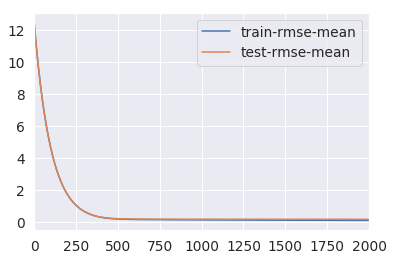

In [0]:
xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

print('Transform DMatrix...')
dtrain = xgb.DMatrix(xtrain, ytrain)
dtest = xgb.DMatrix(xtest)

print('Start Cross Validation...')

cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=5000, early_stopping_rounds=20,verbose_eval=50, show_stdv=False)
cv_output[['train-rmse-mean', 'test-rmse-mean']].plot()
print('best num_boost_rounds = ', len(cv_output))
rounds = len(cv_output)

Transform DMatrix...
Start Cross Validation...
[0]	train-rmse:12.4337	test-rmse:12.4337
[50]	train-rmse:7.52914	test-rmse:7.5293
[100]	train-rmse:4.56255	test-rmse:4.56278
[150]	train-rmse:2.76905	test-rmse:2.76949
[200]	train-rmse:1.68566	test-rmse:1.68654
[250]	train-rmse:1.03295	test-rmse:1.03474
[300]	train-rmse:0.642298	test-rmse:0.645688
[350]	train-rmse:0.412514	test-rmse:0.418539
[400]	train-rmse:0.282467	test-rmse:0.292161
[450]	train-rmse:0.213354	test-rmse:0.227176
[500]	train-rmse:0.1791	test-rmse:0.19654
[550]	train-rmse:0.162228	test-rmse:0.18251
[600]	train-rmse:0.153583	test-rmse:0.176261
[650]	train-rmse:0.148384	test-rmse:0.173016
[700]	train-rmse:0.144743	test-rmse:0.171111
[750]	train-rmse:0.14177	test-rmse:0.169843
[800]	train-rmse:0.139295	test-rmse:0.169058
[850]	train-rmse:0.136879	test-rmse:0.168313
[900]	train-rmse:0.134633	test-rmse:0.16768
[950]	train-rmse:0.132582	test-rmse:0.167152
[1000]	train-rmse:0.130661	test-rmse:0.166699
[1050]	train-rmse:0.12887	tes

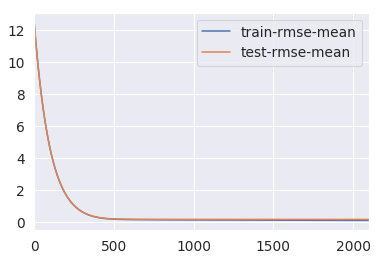

In [0]:
xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

print('Transform DMatrix...')
dtrain = xgb.DMatrix(xdata, ydata)
dtest = xgb.DMatrix(x_real_data_scaled)

print('Start Cross Validation...')

cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=5000, early_stopping_rounds=20,verbose_eval=50, show_stdv=False)
cv_output[['train-rmse-mean', 'test-rmse-mean']].plot()
print('best num_boost_rounds = ', len(cv_output))
rounds = len(cv_output)

Transform DMatrix...
Start Cross Validation...
[0]	train-rmse:12.4337	test-rmse:12.4337
[50]	train-rmse:7.52914	test-rmse:7.5293
[100]	train-rmse:4.56255	test-rmse:4.56277
[150]	train-rmse:2.76904	test-rmse:2.76952
[200]	train-rmse:1.68566	test-rmse:1.68657
[250]	train-rmse:1.03296	test-rmse:1.03476
[300]	train-rmse:0.642308	test-rmse:0.645711
[350]	train-rmse:0.412524	test-rmse:0.418539
[400]	train-rmse:0.282513	test-rmse:0.292202
[450]	train-rmse:0.213435	test-rmse:0.22729
[500]	train-rmse:0.179115	test-rmse:0.196585
[550]	train-rmse:0.162206	test-rmse:0.182513
[600]	train-rmse:0.153502	test-rmse:0.176211
[650]	train-rmse:0.148428	test-rmse:0.173085
[700]	train-rmse:0.144795	test-rmse:0.171205
[750]	train-rmse:0.14177	test-rmse:0.169931
[800]	train-rmse:0.139283	test-rmse:0.169134
[850]	train-rmse:0.136818	test-rmse:0.168353
[900]	train-rmse:0.134571	test-rmse:0.167744
[950]	train-rmse:0.132523	test-rmse:0.167217
[1000]	train-rmse:0.13057	test-rmse:0.16677
[1050]	train-rmse:0.128781	

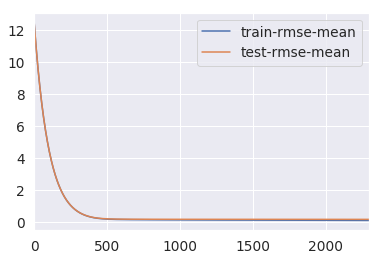

In [0]:
xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

print('Transform DMatrix...')
dtrain = xgb.DMatrix(xdata_raw, ydata)
dtest = xgb.DMatrix(x_real_data)

print('Start Cross Validation...')

cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=5000, early_stopping_rounds=20,verbose_eval=50, show_stdv=False)
cv_output[['train-rmse-mean', 'test-rmse-mean']].plot()
print('best num_boost_rounds = ', len(cv_output))
rounds = len(cv_output)

In [0]:
model = xgb.train(xgb_params, dtrain, num_boost_round = rounds)
preds = model.predict(dtest)

preds = np.exp(preds) - 1

sub = pd.DataFrame(test['id'])
sub['price'] = preds
sub.to_csv('sub_xgb_starter_1.csv', index=False)

In [0]:
import pandas as pd
sub = pd.DataFrame(test['id'])

In [0]:
test['id'].size

6468

In [0]:
xtest.shape

(3758, 29)

In [0]:
pwd

'/content'

In [0]:
xdata_raw.shape

(15029, 26)

In [0]:
pd.DataFrame(xdata_raw)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,1.386294,0.693147,7.074117,8.639588,1.0,0.0,0.0,3.0,7.0,7.074117,0.000000,1955.0,1955.0,98178.0,47.5112,-122.257,1340.0,5650.0,2.079442,0.818803,7.074117,1.000000,0.237168,0.0,9.368147,1.214207
1,1.098612,0.693147,6.647688,9.210440,1.0,0.0,0.0,3.0,6.0,6.647688,0.000000,1933.0,1933.0,98028.0,47.7379,-122.233,2720.0,8062.0,1.791759,0.721756,6.647688,1.000000,0.337385,0.0,9.257745,1.023549
2,1.386294,1.098612,7.427144,8.997271,1.0,0.0,0.0,3.0,8.0,7.427144,0.000000,1987.0,1987.0,98074.0,47.6168,-122.045,1800.0,7503.0,2.484907,0.825489,7.427144,1.000000,0.239904,0.0,11.307711,0.826257
3,1.386294,1.178655,7.447751,8.827615,2.0,0.0,0.0,3.0,7.0,7.447751,0.000000,1995.0,1995.0,98003.0,47.3097,-122.327,2238.0,6819.0,2.564949,0.843688,7.447751,1.000000,0.328201,0.0,10.626177,1.012780
4,1.386294,0.916291,6.966967,9.181118,1.0,0.0,0.0,3.0,7.0,6.966967,0.000000,1963.0,1963.0,98198.0,47.4095,-122.315,1650.0,9711.0,2.302585,0.758837,6.966967,1.000000,0.169910,0.0,10.032009,1.002206
5,1.386294,1.252763,8.177797,9.189831,1.0,0.0,0.0,3.0,8.0,7.528869,7.438972,1965.0,1965.0,98007.0,47.6007,-122.145,2210.0,8925.0,2.639057,0.889874,14.967841,0.546358,0.247619,0.0,22.185816,2.235851
6,1.098612,0.693147,7.057037,8.699681,1.0,0.0,0.0,4.0,7.0,6.758095,5.707110,1942.0,1942.0,98115.0,47.6900,-122.292,1330.0,6000.0,1.791759,0.811183,12.465205,0.566139,0.221667,0.0,16.093229,2.073329
7,1.386294,0.693147,7.266129,9.898576,1.5,0.0,0.0,4.0,7.0,7.266129,0.000000,1927.0,1927.0,98028.0,47.7558,-122.229,1780.0,12697.0,2.079442,0.734058,7.266129,1.000000,0.140191,0.0,10.119001,1.118771
8,1.386294,1.011601,7.223296,9.177920,1.0,0.0,0.0,4.0,7.0,7.223296,0.000000,1977.0,1977.0,98074.0,47.6127,-122.045,1370.0,10208.0,2.397895,0.787030,7.223296,1.000000,0.134208,0.0,10.997355,0.803580
9,1.791759,1.098612,7.501634,8.486940,1.5,0.0,0.0,3.0,7.0,7.501634,0.000000,1900.0,1900.0,98107.0,47.6700,-122.394,1360.0,4850.0,2.890372,0.883903,7.501634,1.000000,0.280412,0.0,10.884515,1.290916
